In [1]:
import pandas as pd
from auto_ml.utils_models import load_ml_model
import matplotlib.pyplot as plot

C:\Users\Francesco Manghi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
dataset = pd.read_csv('dataset_con_annunci.csv', sep=";")
dataset.drop(columns='Unnamed: 0', inplace=True)
dataset.fillna(0, inplace=True)

In [3]:
dataset['Superficie'].unique()

array(['30', '70', '25', '80', '28', '20', '40', '50', '45', '23', '65',
       '31', '55', '75', '57', '85', '320', '43', '35', '120', '18', '96',
       '98', '48', '105', '22', '42', '90', '148', '131', '34', '1.000',
       '160', '33', '56', '100', '51', '53', '67', '73', '60', '52', '68',
       '95', '84', '104', '32', '89', '110', '47', '15', '140', '71',
       '97', '118', '77', '240', '145', '64', '44', '54', '58', '115',
       '76', '81', '150', '12', '79', '72', '124', '130', '49', '123',
       '62', '82', '260', '99', '235', '600', '450', '250', '200', '190',
       '203', '135', '180', '66', '59', '170', '39', '142', '36', '91',
       '195', '230', '187', '112', '330', '373', '196', '113', '41',
       '300', '147', '202', '29', '162', '101', '380', '390', '289',
       '210', '400', '220', '141', '310', '339', '61', '138', '133',
       '270', '245', '125', '92', '114', '165', '185', '38', '212', '119',
       '155', '137', '46', '126', '440', '215', '350', '127', '1

In [4]:
dataset = dataset[dataset.Prezzo != 'Affitto\n                                                                                    750/mese\n                                        ']
dataset = dataset[dataset.Prezzo != 'Affitto\n                                                                                    500/mese\n                                        ']
dataset = dataset[dataset.Locali != 'C']
dataset = dataset[dataset.Prezzo != 'prezzo su richiesta']
dataset = dataset[dataset.Superficie != '250, terreno di proprietà 2.000']
dataset = dataset[dataset.Superficie != '100, terreno di proprietà 200']
dataset = dataset[dataset.Superficie != '160, terreno di proprietà 400']
dataset = dataset[dataset.Superficie != '165, terreno di proprietà 450']
dataset = dataset[dataset.Superficie != '105, terreno di proprietà 100']

In [5]:
dataset['Prezzo'] = dataset['Prezzo'].astype(int)
dataset['Superficie'] = dataset['Superficie'].astype(int)
dataset = dataset[dataset['Prezzo']<1000]
prezzi = dataset['Prezzo']
indirizzi = dataset['Link annuncio']
dataset.drop(columns= ['Link annuncio','Prezzo','Spese condominio', 'Spese riscaldamento'], inplace=True)

In [6]:
trained_ml_pipeline = load_ml_model("auto_ml_saved_pipeline.dill")
predictions = trained_ml_pipeline.predict(dataset)

130.96477603946096


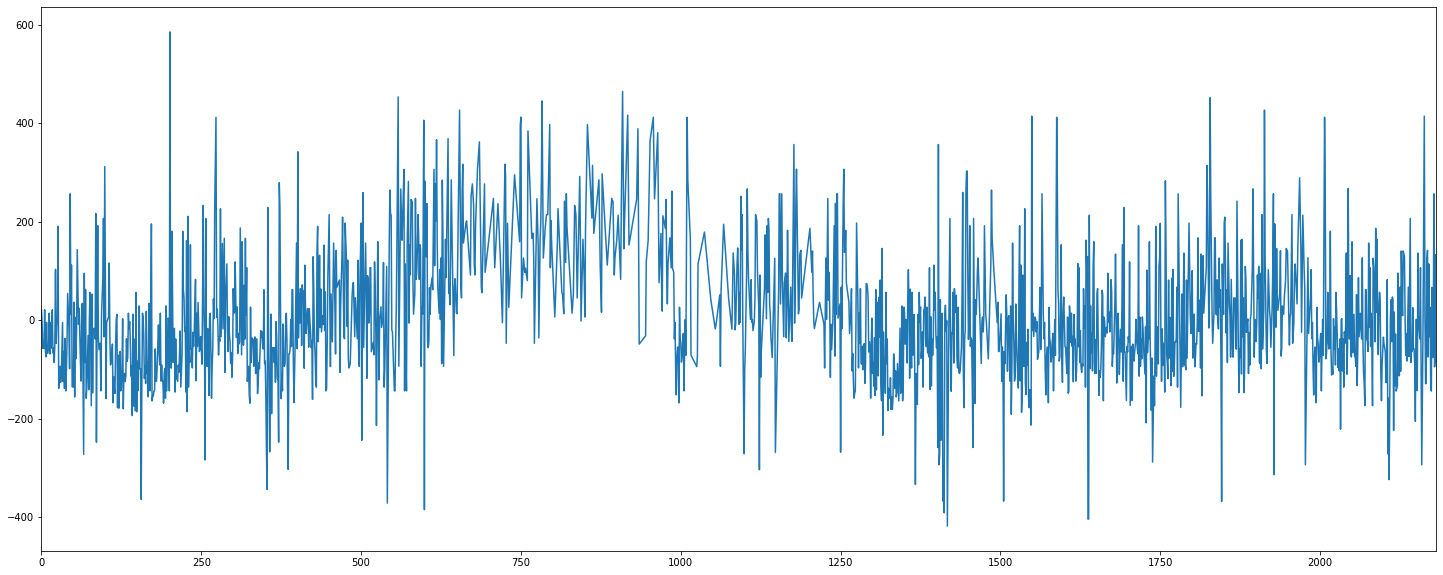

In [7]:
diff = prezzi-predictions
print(diff.std())
diff.plot(figsize=(25,10))
dataset['Predictions'] = predictions
dataset['Prezzo'] = prezzi
dataset['Diff'] = diff
dataset['Link annuncio'] = indirizzi

In [9]:
#temp = dataset[dataset['Diff']<0]
temp = dataset
temp = temp[temp['Superficie']>45]

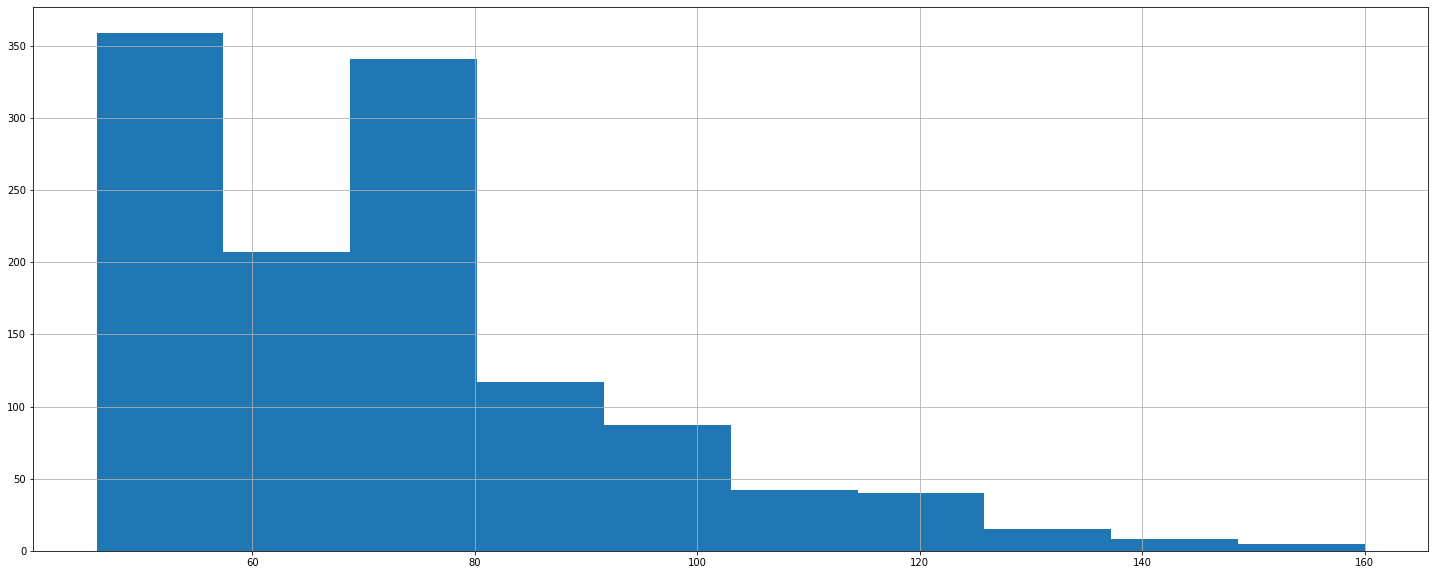

In [10]:
temp['Superficie'].hist(figsize=(25,10))

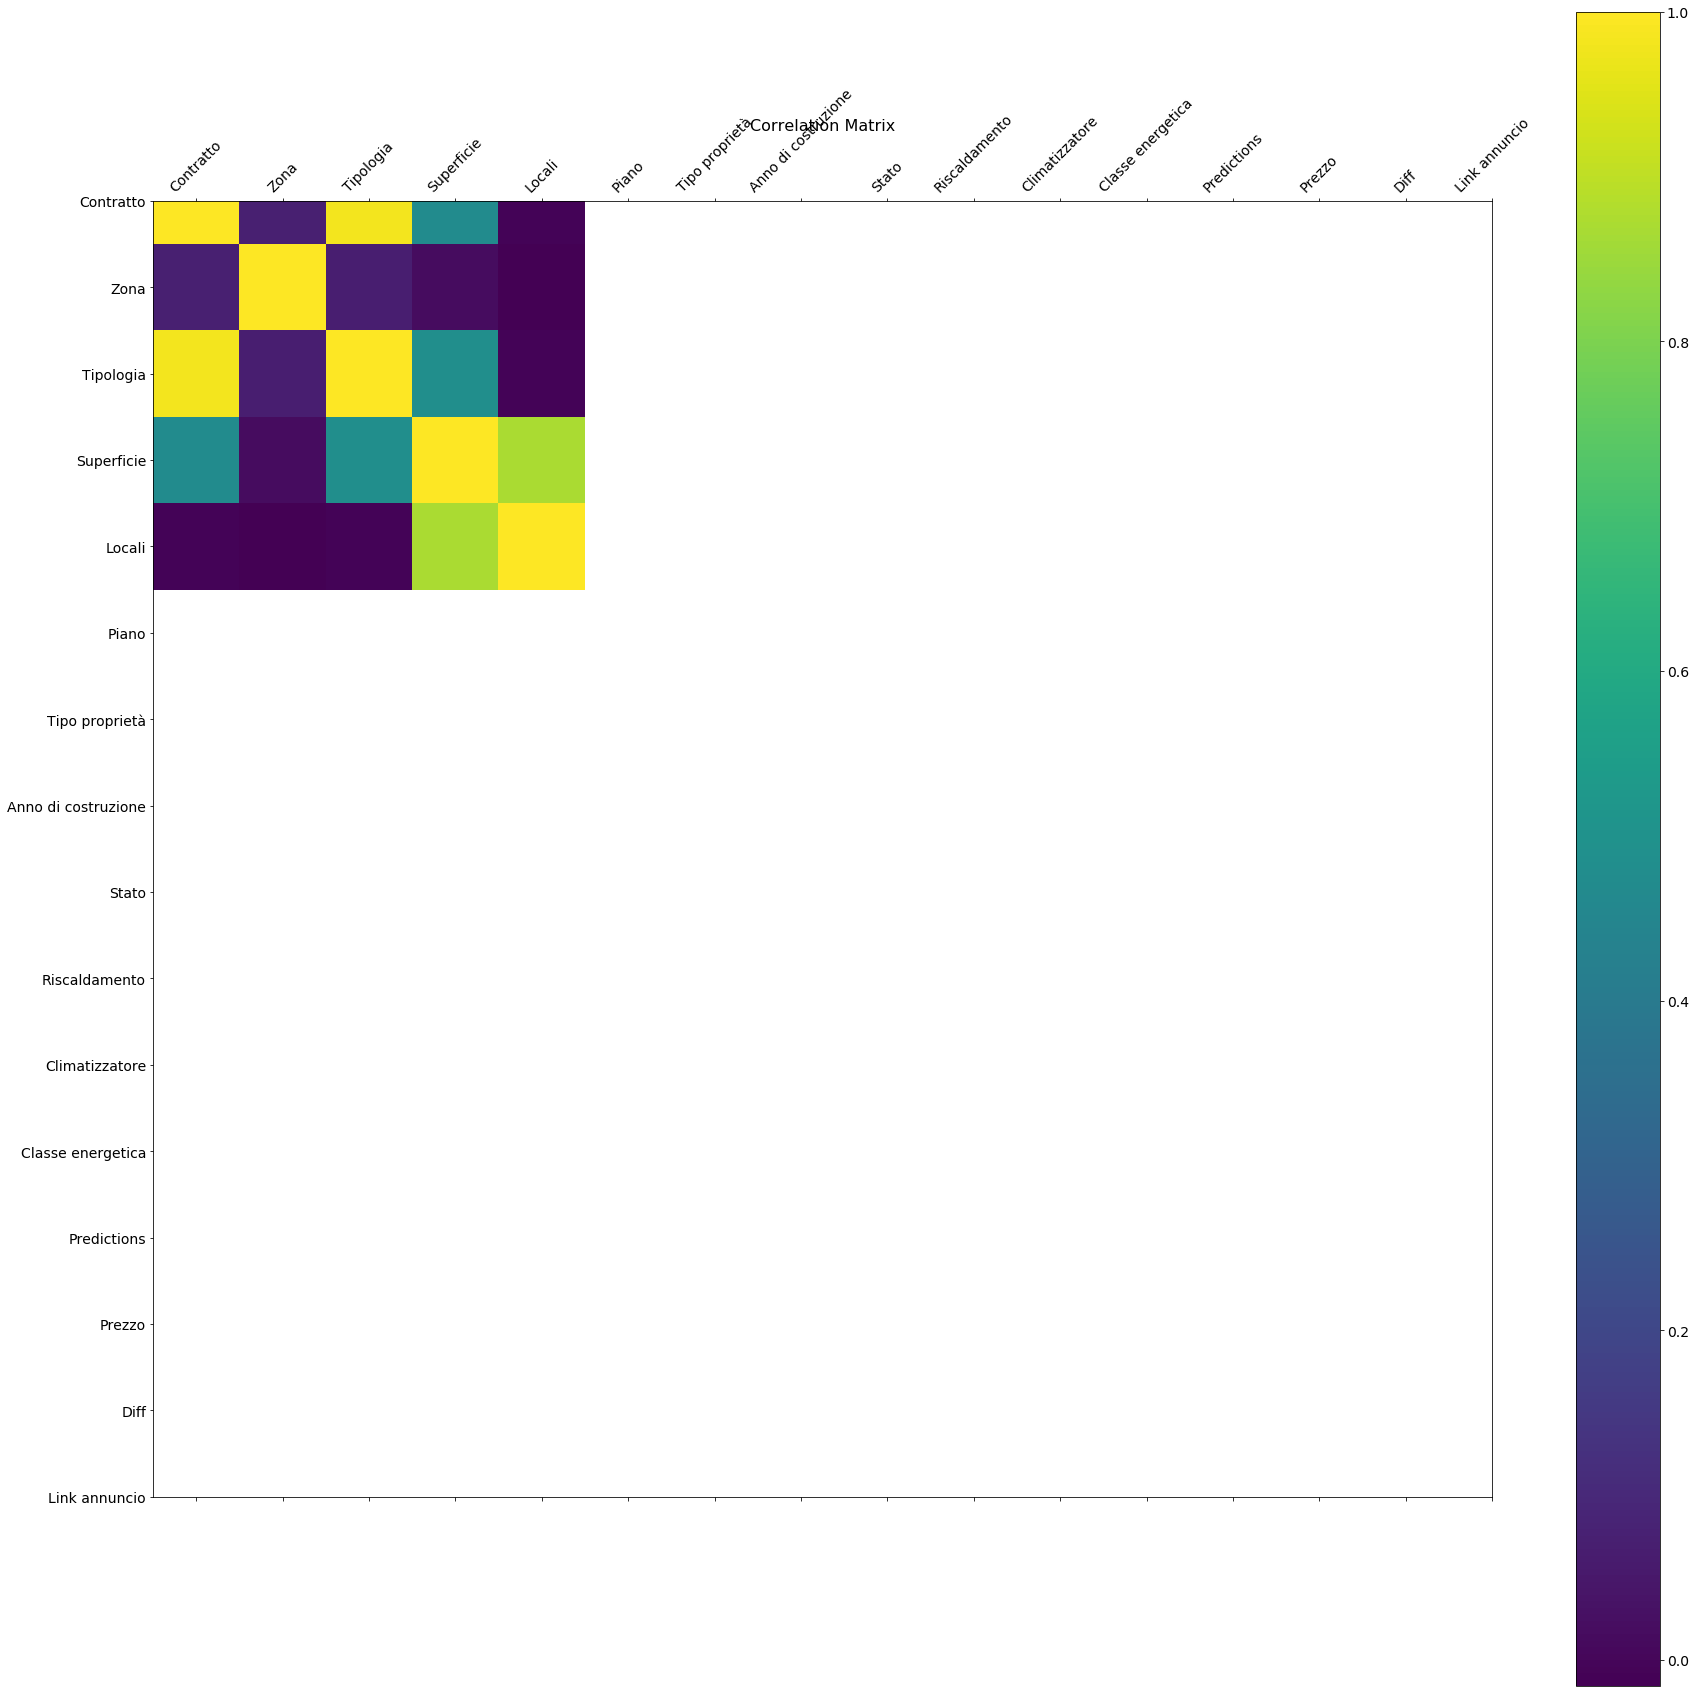

In [11]:
f = plot.figure(figsize=(30, 30))
plot.matshow(temp.corr(), fignum=f.number)
plot.xticks(range(temp.shape[1]), temp.columns, fontsize=14, rotation=45)
plot.yticks(range(temp.shape[1]), temp.columns, fontsize=14)
cb = plot.colorbar()
cb.ax.tick_params(labelsize=14)
plot.title('Correlation Matrix', fontsize=16);

In [12]:
temp.to_csv('Risultato_filtri.csv', sep=';', decimal=',')